In [1]:
import numpy as np
import pandas as pd 
pd.options.mode.chained_assignment = None

In [2]:
def encodeCsv(csv, isTestCsv=False):
    if not isTestCsv:
        csv.drop(columns=['index'], inplace=True)
        
    for genderIndex in range(len(csv['Gender'])):
        genderValue = csv['Gender'][genderIndex]
        csv.loc[genderIndex, 'Gender'] = float(genderValue == 'Male')

    for dietaryIndex in range(len(csv['Dietary Habits'])):
        dietaryValue = csv['Dietary Habits'][dietaryIndex]
        csv.loc[dietaryIndex, 'Dietary Habits'] = {'Unhealthy':0.0, 'Moderate':0.5, 'Healthy':1.0}[dietaryValue]

    # loop through each label that has a scale
    scales = {
        'Age':[float('inf'), float('-inf')], 
        'Academic Pressure':[float('inf'), float('-inf')], 
        'Study Satisfaction':[float('inf'), float('-inf')], 
        'Study Hours':[float('inf'), float('-inf')], 
        'Financial Stress':[float('inf'), float('-inf')]
    }

    # first, find the ranges of the scales
    for scaleIndex in range(len(csv['Age'])):
        for scale in scales:
            scaleValue = csv[scale][scaleIndex]
            scales[scale][0] = min(scales[scale][0], scaleValue)
            scales[scale][1] = max(scales[scale][1], scaleValue)

    # next, normalize the values in the scale down to 0-1
    for scaleIndex in range(len(csv['Age'])):
        for scale in scales:
            scaleValue = csv[scale][scaleIndex]
            scaleMin, scaleMax = scales[scale]

            csv.loc[scaleIndex, scale] = (scaleValue - scaleMin) / (scaleMax - scaleMin)

    for itemIndex in range(len(csv['Have you ever had suicidal thoughts ?'])):
        for topic in ['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']:
            itemValue = csv[topic][itemIndex]

            csv.loc[itemIndex, topic] = float(itemValue == 'Yes')

    if not isTestCsv:
        for outputIndex in range(len(csv['Depression'])):
            outputValue = csv['Depression'][outputIndex]
            csv.loc[outputIndex, 'Depression'] = float(outputValue == 'Yes')

    for sleepIndex in range(len(csv['Sleep Duration'])):
        sleepValue = csv['Sleep Duration'][sleepIndex]
        # Less then 5 hours, 5-6 hours, 7-8 hours, More than 8 hours
        # 0,                 0.25, --,  0.75,      1.0

        csv.loc[sleepIndex, 'Sleep Duration'] = {'Less than 5 hours':0, '5-6 hours':0.25, '7-8 hours':0.75, 'More than 8 hours':1.0}[sleepValue]
    
    return csv

In [3]:
trainCsv = encodeCsv(pd.read_csv('train.csv'))

C:\Users\aarav\AppData\Local\Temp\ipykernel_37848\2822658365.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  csv.loc[scaleIndex, scale] = (scaleValue - scaleMin) / (scaleMax - scaleMin)
C:\Users\aarav\AppData\Local\Temp\ipykernel_37848\2822658365.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  csv.loc[scaleIndex, scale] = (scaleValue - scaleMin) / (scaleMax - scaleMin)
C:\Users\aarav\AppData\Local\Temp\ipykernel_37848\2822658365.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9166666666666666' has dtype incompatible with int64, please e

In [4]:
trainCsv

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,0.9375,0.25,0.75,0,0.0,1.0,1.000000,0.75,1.0,1.0
1,0.0,0.0000,0.00,1.00,0,0.0,0.0,0.916667,1.00,1.0,1.0
2,0.0,0.2500,0.00,0.00,0,1.0,0.0,0.166667,0.25,0.0,0.0
3,1.0,0.6250,0.50,0.25,1.0,1.0,0.0,0.250000,0.00,1.0,0.0
4,1.0,0.6875,1.00,0.50,0.25,1.0,0.0,0.916667,0.25,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
396,0.0,0.1875,0.00,0.75,0.75,1.0,0.0,0.666667,1.00,1.0,0.0
397,0.0,0.1250,0.50,0.75,1.0,0.0,1.0,0.250000,0.75,1.0,1.0
398,0.0,0.8750,0.75,0.50,0,1.0,1.0,0.916667,0.75,0.0,1.0
399,0.0,0.5625,0.50,0.75,0.25,1.0,0.0,0.000000,0.25,0.0,0.0


In [5]:
trainCsvNp = trainCsv.to_numpy()
trainCsvNp

array([[1.0, 0.9375, 0.25, ..., 0.75, 1.0, 1.0],
       [0.0, 0.0, 0.0, ..., 1.0, 1.0, 1.0],
       [0.0, 0.25, 0.0, ..., 0.25, 0.0, 0.0],
       ...,
       [0.0, 0.875, 0.75, ..., 0.75, 0.0, 1.0],
       [0.0, 0.5625, 0.5, ..., 0.25, 0.0, 0.0],
       [0.0, 0.4375, 0.5, ..., 0.5, 0.0, 0.0]], dtype=object)

In [6]:
X, y = trainCsvNp[:, :-1].astype(np.float32), trainCsvNp[:, -1].astype(np.float32)

trainAmt = int(len(y) * 0.8)
trainX, valX = X[0:trainAmt], X[trainAmt:]
trainY, valY = y[0:trainAmt], y[trainAmt:]

In [7]:
import tensorflow as tf
import keras
from keras import layers
from sklearn.metrics import f1_score

In [8]:
model = keras.Sequential([
    keras.Input(shape=(10,)),
    layers.Dense(16, 'relu'),
    layers.Dense(16, 'relu'),
    layers.Dense(16, 'relu'),
    layers.Dense(1, 'sigmoid')
])

model.compile('adam', keras.losses.BinaryCrossentropy, metrics=['accuracy'])

In [9]:
history = model.fit(
    x=trainX,
    y=trainY,
    batch_size=8,
    epochs=50,
    verbose=1,
    validation_data=(valX, valY)
)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4999 - loss: 0.6929 - val_accuracy: 0.6296 - val_loss: 0.6539
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.6533 - val_accuracy: 0.7160 - val_loss: 0.6047
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7421 - loss: 0.5893 - val_accuracy: 0.8148 - val_loss: 0.5344
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.5091 - val_accuracy: 0.8889 - val_loss: 0.4482
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.4384 - val_accuracy: 0.9012 - val_loss: 0.3548
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9012 - loss: 0.3278 - val_accuracy: 0.9383 - val_loss: 0.2624
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9560 - loss: 0.2392 - val_accuracy: 0.9383 - val_loss: 0.1982
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9487 - loss: 0.2024 - val_accuracy: 0.9753 - val_loss:

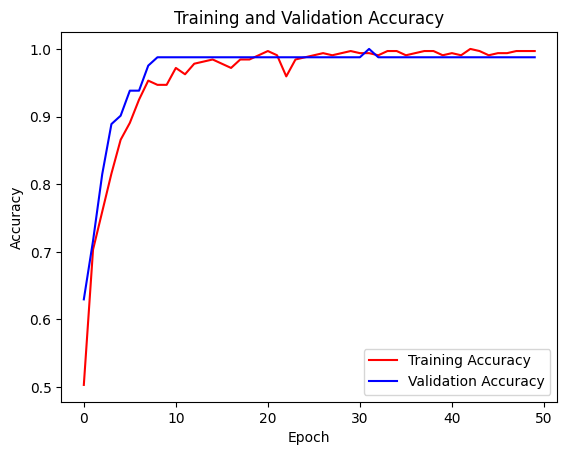

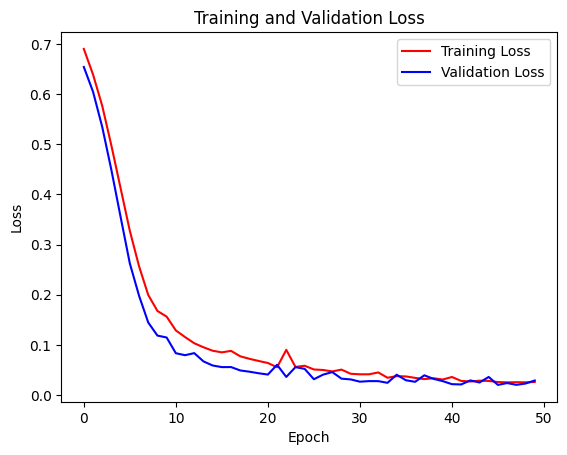

In [10]:
import matplotlib.pyplot as plt
for feature in history.history.keys():
    if 'val_' in feature:
        break
    plt.plot(history.history[feature], 'r', label=f'Training {feature.capitalize()}')
    plt.plot(history.history[f'val_{feature}'], 'b', label=f'Validation {feature.capitalize()}')
    plt.title('Training and Validation ' + feature.capitalize())
    plt.xlabel('Epoch')
    plt.ylabel(feature.capitalize())
    plt.legend()
    plt.show()

In [11]:
testCsv = encodeCsv(pd.read_csv('test.csv'), isTestCsv=True)
xTest = testCsv.to_numpy().astype(np.float32)
xTest, xIndices = xTest[:, :-1], xTest[:, -1]
xIndices = xIndices.astype(int)
testDatasetPredictions = np.squeeze(model.predict(xTest) > 0.5)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

C:\Users\aarav\AppData\Local\Temp\ipykernel_37848\2822658365.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  csv.loc[scaleIndex, scale] = (scaleValue - scaleMin) / (scaleMax - scaleMin)
C:\Users\aarav\AppData\Local\Temp\ipykernel_37848\2822658365.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  csv.loc[scaleIndex, scale] = (scaleValue - scaleMin) / (scaleMax - scaleMin)
C:\Users\aarav\AppData\Local\Temp\ipykernel_37848\2822658365.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please ex

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [12]:
testDatasetPredictions = np.where(testDatasetPredictions == True, 'Yes', 'No')


In [13]:
combined = (zip(xIndices, testDatasetPredictions))

In [14]:
import csv

with open('predictions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['index', 'Depression'])
    for index, pred in combined:
        writer.writerow([index, pred])